In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hypothesis_tests import NEWCORR, DCOR, HSIC, TIC, HHG
from power_comparison import LINEAR, STEP_FUNC, W_SHAPED, SINUSOID, CIRCULAR, HETERO, NOISE_LEVELS

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['text.usetex'] = True

In [3]:
noise_values = torch.arange(NOISE_LEVELS + 1) / NOISE_LEVELS

In [4]:
titles = {
    LINEAR: "Linear",
    STEP_FUNC: "Step Function",
    W_SHAPED: "W-shaped",
    SINUSOID: "Sinusoid",
    CIRCULAR: "Circular",
    HETERO: "Heteroskedastic",
}

labels = {
    NEWCORR: r"$\xi_n$", 
    DCOR: "dcor",
    HSIC: "HSIC",
    TIC: "TIC",
    HHG: "HHG",
}

In [11]:
def make_ax(ax, relationship):
    offset = 0.02

    markers = {
        NEWCORR: "D",
        DCOR: "o",
        HSIC: "+",
        TIC: "^",
        HHG: "x"
    }

    for method in [DCOR, TIC, HHG]:
    # for method in [MIC]:
        marker_style = {
            "markerfacecolor" :'w',
            "markeredgecolor":"k",
            "marker": markers[method],
            "markersize": 10,
        }
        powers = np.genfromtxt(f"results/power/{method}_true_power_{relationship}.txt")
        ax.plot(noise_values, powers, color="k", **marker_style, label=labels[method])
        # for i, power in enumerate(powers):
        #     ax.annotate(f"{power.item():0.2f}", xy=(noise_values[i] + offset, power + offset))

    # Chatterjee done in Python.
    marker_style = {
        "markerfacecolor" :'w',
        "markeredgecolor":"r",
        "markersize": 10,
        "marker": markers[NEWCORR]
    }

    powers = torch.load(f"results/power/{relationship}_{NEWCORR}_true_powers.pt")
    ax.plot(noise_values, powers, color="r",**marker_style, label=labels[NEWCORR])

    # HSIC done in Python.
    marker_style = {
        "markerfacecolor" :'w',
        "markeredgecolor":"k",
        "markersize": 10,
        "marker": markers[HSIC]
    }
    powers = torch.load(f"results/power/{relationship}_{HSIC}_true_powers.pt")
    ax.plot(noise_values, powers, color="k",**marker_style, label=labels[HSIC])
    # for i, power in enumerate(powers):
    #     ax.annotate(f"{power.item():0.2f}", xy=(noise_values[i] + offset, power + offset))

    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(titles[relationship])
    # ax.set_xlabel("Noise Level")
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylabel("Power")
    ax.legend(loc="upper right")


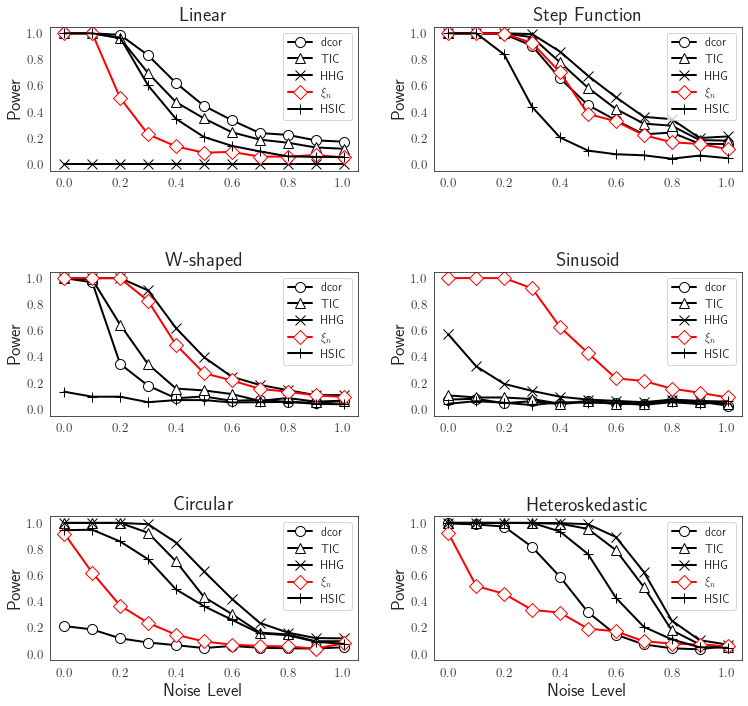

In [12]:
sns.set_style("white")

fig, axes = plt.subplots(3, 2, figsize=(12, 11))

make_ax(axes[0, 0], LINEAR)
make_ax(axes[0, 1], STEP_FUNC)
make_ax(axes[1, 0], W_SHAPED)
make_ax(axes[1, 1], SINUSOID)
make_ax(axes[2, 0], CIRCULAR)
make_ax(axes[2, 1], HETERO)

axes[2, 0].set_xlabel("Noise Level")
axes[2, 1].set_xlabel("Noise Level")

# TODO: Subplot adjust.

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.7)
plt.savefig(f"figs/figure-5-rep-true.pdf", bbox_inches="tight")
plt.show()
plt.close(fig)